###1) ECM

In [ ]:
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/inmobiliaria.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=int, delimiter=",")

# Genero columnas de superficie/cantidad de habitaciones y precio segun el dataset
superficie = np.reshape(np.array(dataset[:,0]), (len(dataset), 1))
habitaciones = np.reshape(np.array(dataset[:,1]), (len(dataset), 1))
precios_reales = np.array(dataset[:,2])

# Uno las columnas de superficie y cantidad de habitaciones
sup_hab = np.append(superficie, habitaciones, axis = 1)

# Genero columna de unos
unos = np.ones((len(dataset), 1))

# Uno la columna de unos con la matriz de superficies y habitaciones
x = np.append(unos, sup_hab, axis = 1)

# Obtengo la pseudoinversa de esa matriz
x_inv = np.linalg.pinv(x)

# Calculo w estrella
w_estrella = np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(), x)), x.transpose()), precios_reales)

b = w_estrella[0]
w_superficie = w_estrella[1]
w_habitaciones = w_estrella[2]

# CAlculo la columna de ganancia predicha
precios_predichos = np.dot(x, w_estrella)

# Calculo el error cuadratico medio
emc = (np.square(precios_reales - precios_predichos)).mean()
print("El EMC es: ", emc)

El EMC es:  4086560101.205658


###2) Prediccion de un valor a partir de w y b

In [ ]:
y = w_superficie * 1650 + w_habitaciones * 3 + b
print("EL precio estimado para una superficie de 1650 y 3 habitaciones es: ", y)

EL precio estimado para una superficie de 1650 y 3 habitaciones es:  293081.46433489583


###3) Graficar el problema de optimización en 3-D (bias - weight y Risk) para todos los theta posibles

###4) Resolver el problema con GD

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2)) # cambio el input a 2 dimensiones (superficies y habitaciones)

model.summary()

# Sin stopping
# Debo normalizar la entrada porque sino le costará converger al modelo cuando hay dos entradas
superficie_normalizado = np.divide((np.subtract(superficie, superficie.mean())), superficie.std())   # std es el desvio estandar
habitaciones_normalizado = np.divide((np.subtract(habitaciones, habitaciones.mean())), habitaciones.std())

# Uno las columnas de superficie y cantidad de habitaciones normalizadas
sup_hab_normalizado = np.append(superficie_normalizado, habitaciones_normalizado, axis = 1)

"""
# Sin EarlyStopping
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),loss='MeanSquaredError')
hist = model.fit(x=sup_hab_normalizado, y=precios_reales, batch_size = 47, epochs= 10000)
"""

# Hasta convergencia
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             # EarlyStopping: determino cuando pare el algoritmo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5), loss = 'MeanSquaredError')
hist = model.fit(x=sup_hab_normalizado, y=precios_reales, batch_size = 47, epochs=10000,callbacks=[es]) # Batch_size: tamaño de la muestra

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
2000.6808510638298
Epoch 1/10000
1/1 [==============================] - 0s 162ms/step - loss: 131183362048.0000
Epoch 2/10000
1/1 [==============================] - 0s 10ms/step - loss: 7603492352.0000
Epoch 3/10000
1/1 [==============================] - 0s 10ms/step - loss: 5189341184.0000
Epoch 4/10000
1/1 [==============================] - 0s 9ms/step - loss: 4432350720.0000
Epoch 5/10000
1/1 [==============================] - 0s 8ms/step - loss: 4194987520.0000
Epoch 6/10000
1/1 [==============================] - 0s 9ms/step - loss: 4120558592.0000
Epoch 7/10000
1/1 [=========

###5) Plotear riesgo vs epochs

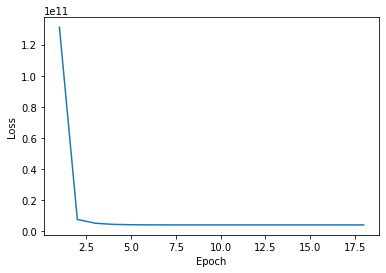

In [ ]:
# Grafico de riesgo (loss - emc) vs epoch
losses = np.array(hist.history['loss'])                                                       # losses es una lista con los errores cometidos en cada epoch
param = model.get_weights()

epochs = np.arange(1, 19, 1)
plt.plot(epochs,losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()